In [2]:
from iohblade.loggers import ExperimentLogger
from iohblade import plot_convergence, plot_experiment_CEG
import os

logger = ExperimentLogger('results/kerneltuner-new', True)


In [3]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['gemini-2.0-flash']
['kerneltuner-gemm']


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


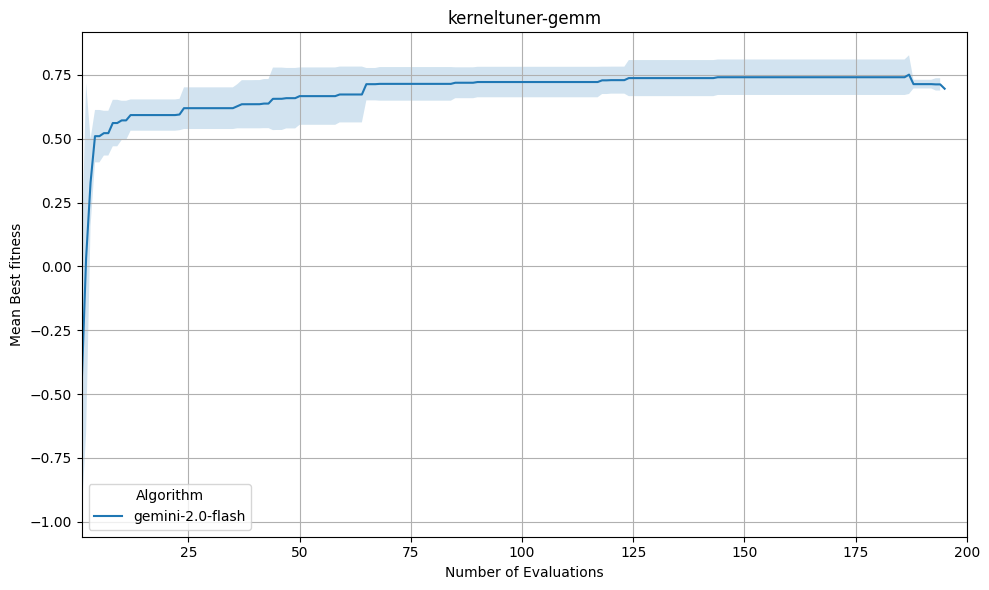

kerneltuner-gemm 123


In [5]:
import numpy as np
import json



plot_convergence(logger, metric="fitness", save=False, budget=200)

for problem in problems:
    data = logger.get_problem_data(problem_name=problem)
    idx = data['fitness'].idxmax()
    print(problem, idx)
    with open(f'alg-{problem}.py', 'w', encoding='utf-8') as f:
        f.write(data.iloc[idx]['code'])

